# <center> Algorithmic Trading Stratergy with Python

<img src="https://drive.google.com/uc?id=11I962_LXGgw2LFePPXDhtSGjLRFb2XlN" align=right width=100>

<div align=right> กรอภิชิต เหง้าพันธ์ <br>รหัสนักศึกษา2010531201015 </div>

<div align=right>อีเมล 2010531201015@live4.utcc.ac.th</div>

In [2]:
#import libralies
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Load data
AAPL = pd.read_csv(r'E:\WPy64-3870\notebooks\AAPL.csv')
#Show data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,42.209846,195208000
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,42.501698,153816000
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.648827,113605600
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.612656,95154000
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,42.217075,126814000
...,...,...,...,...,...,...,...
750,2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,158273000
751,2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,111039900
752,2021-02-25,124.680000,126.459999,120.540001,120.989998,120.989998,148199500
753,2021-02-26,122.589996,124.849998,121.199997,121.260002,121.260002,164320000


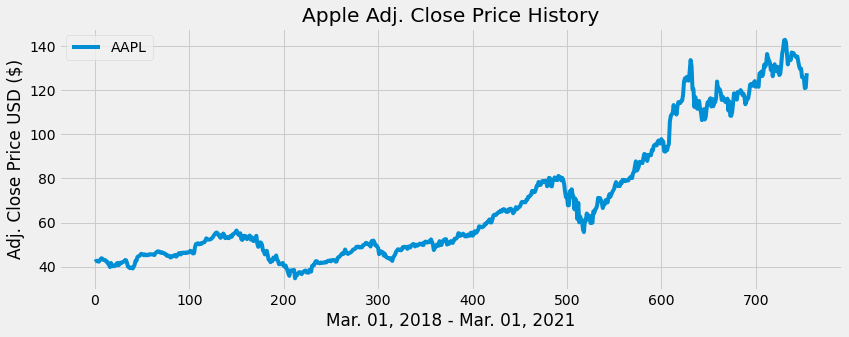

In [5]:
#Vitualize
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Mar. 01, 2018 - Mar. 01, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
#Create the simple moving average with a 30 days widow
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
750,133.520064
751,133.405478
752,133.151551
753,132.837061


In [7]:
#Create a simple moving 100 days average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
750,124.513904
751,124.613023
752,124.658774
753,124.744804


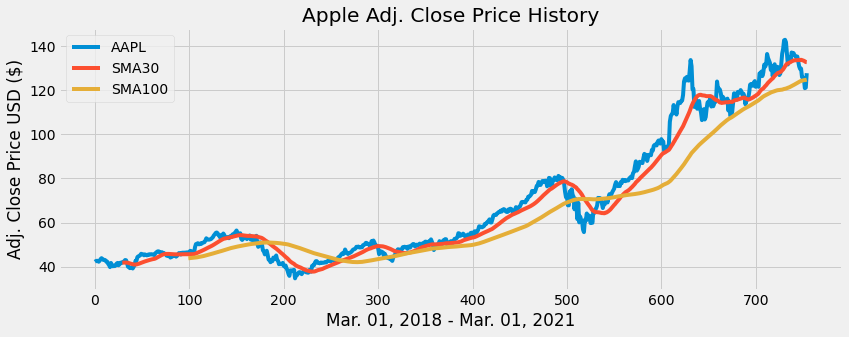

In [18]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Mar. 01, 2018 - Mar. 01, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [19]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,42.209846,NaN,NaN
1,42.501698,NaN,NaN
2,42.648827,NaN,NaN
3,42.612656,NaN,NaN
4,42.217075,NaN,NaN
...,...,...,...
750,125.860001,133.520064,124.513904
751,125.349998,133.405478,124.613023
752,120.989998,133.151551,124.658774
753,121.260002,132.837061,124.744804


In [41]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return (sigPriceBuy, sigPriceSell)
                                

In [42]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [43]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal Price,Sell_Signal Price,Buy_Signal_Price,Sell_Signal_Price
0,42.209846,NaN,NaN,NaN,NaN,NaN,NaN
1,42.501698,NaN,NaN,NaN,NaN,NaN,NaN
2,42.648827,NaN,NaN,NaN,NaN,NaN,NaN
3,42.612656,NaN,NaN,NaN,NaN,NaN,NaN
4,42.217075,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
750,125.860001,133.520064,124.513904,NaN,NaN,NaN,NaN
751,125.349998,133.405478,124.613023,NaN,NaN,NaN,NaN
752,120.989998,133.151551,124.658774,NaN,NaN,NaN,NaN
753,121.260002,132.837061,124.744804,NaN,NaN,NaN,NaN


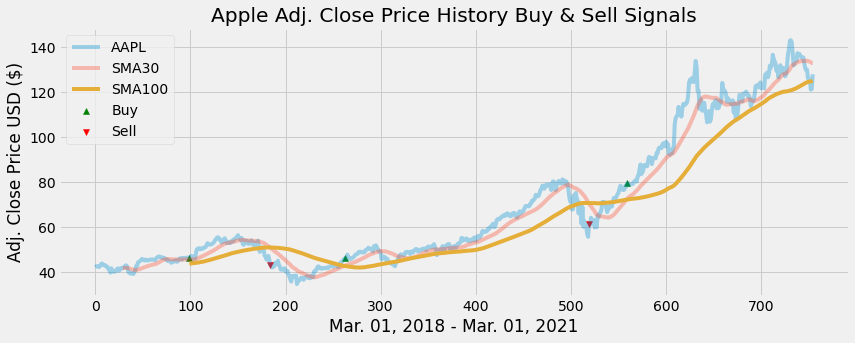

In [44]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100')
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Mar. 01, 2018 - Mar. 01, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()